In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, row_number
spark = SparkSession.builder.appName("ExtractNestedData").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/18 17:48:10 WARN Utils: Your hostname, Benjamins-MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.35 instead (on interface en0)
25/11/18 17:48:10 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/18 17:48:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/18 17:48:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
df = spark.read.format("csv").option('header', 'true').load("/Users/benjaminbrooke/.cache/kagglehub/datasets/sakhawat18/asteroid-dataset/versions/275/dataset.csv")

In [3]:
print(df.columns)
print(df.count())
print(len(df.columns))

['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']


958524
45


In [4]:
from pyspark.sql.window import Window

df = df.withColumn("Index", row_number().over(Window.partitionBy().orderBy("id")))

df = df.filter(col("Index") < 10000)

In [8]:
"""Basic Column Definition
SPK-ID: Object primary SPK-ID
Object ID: Object internal database ID
Object fullname: Object full name/designation
pdes: Object primary designation
name: Object IAU name
NEO: Near-Earth Object (NEO) flag
PHA: Potentially Hazardous Asteroid (PHA) flag
H: Absolute magnitude parameter
Diameter: object diameter (from equivalent sphere) km Unit
Albedo: Geometric albedo
Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
Orbit_id: Orbit solution ID
Epoch: Epoch of osculation in modified Julian day form
Equinox: Equinox of reference frame
e: Eccentricity
a: Semi-major axis au Unit
q: perihelion distance au Unit
i: inclination; angle with respect to x-y ecliptic plane
tp: Time of perihelion passage TDB Unit
moid_ld: Earth Minimum Orbit Intersection Distance au Unit"""

'Basic Column Definition\nSPK-ID: Object primary SPK-ID\nObject ID: Object internal database ID\nObject fullname: Object full name/designation\npdes: Object primary designation\nname: Object IAU name\nNEO: Near-Earth Object (NEO) flag\nPHA: Potentially Hazardous Asteroid (PHA) flag\nH: Absolute magnitude parameter\nDiameter: object diameter (from equivalent sphere) km Unit\nAlbedo: Geometric albedo\nDiameter_sigma: 1-sigma uncertainty in object diameter km Unit\nOrbit_id: Orbit solution ID\nEpoch: Epoch of osculation in modified Julian day form\nEquinox: Equinox of reference frame\ne: Eccentricity\na: Semi-major axis au Unit\nq: perihelion distance au Unit\ni: inclination; angle with respect to x-y ecliptic plane\ntp: Time of perihelion passage TDB Unit\nmoid_ld: Earth Minimum Orbit Intersection Distance au Unit'

In [15]:
Diameter = df.rdd.flatMap(lambda x: x).collect()

print(Diameter[:100])

['a0000001', '2000001', '     1 Ceres', '1', 'Ceres', None, 'N', 'N', '3.4', '939.4', '0.090', '0.2', 'JPL 47', '2458600.5', '58600', '20190427.0000000', 'J2000', '.0760090265983052', '2.769165148633284', '2.558683601195717', '10.59406719506626', '80.30553090445737', '73.59769469844186', '77.37209751948711', '2.979646696070851', '.2138852265918273', '2458238.754129317955', '20180430.2541293', '1683.145702657688', '4.60820178687936', '1.59478', '620.6405326', '4.819E-12', '1.0328E-11', '1.9569E-11', '4.6089E-9', '6.1688E-8', '6.6248E-8', '7.8207E-9', '1.1113E-11', '1.1965E-12', '3.7829E-8', '9.4159E-9', 'MBA', '.43301', 1, 'a0000002', '2000002', '     2 Pallas', '2', 'Pallas', None, 'N', 'N', '4.2', '545', '0.101', '18', 'JPL 37', '2459000.5', '59000', '20200531.0000000', 'J2000', '.2299722588646258', '2.773841434873298', '2.135934854363191', '34.83293159121413', '173.0247412488342', '310.2023924446679', '144.9756754788195', '3.411748015383405', '.213344586343708', '2458320.962365774508

In [18]:
Diameter = df.select("Diameter").rdd.flatMap(lambda x: x).collect()
PHA = df.select("PHA").rdd.flatMap(lambda x: x).collect()

print(Diameter[:10])
print(PHA[:10])

25/11/18 18:08:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:08:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:08:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:08:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:08:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:08:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 1

['939.4', '545', '246.596', '525.4', '106.699', '185.18', '199.83', '147.491', '190', '407.12']
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


25/11/18 18:31:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:31:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


[['0.3', 'Y'], ['0.3', 'Y'], ['0.33', 'Y'], ['0.4', 'N'], ['0.42', 'Y'], ['0.498', 'N'], ['0.5', 'N'], ['0.5', 'Y'], ['0.53', 'Y'], ['0.55', 'Y']]


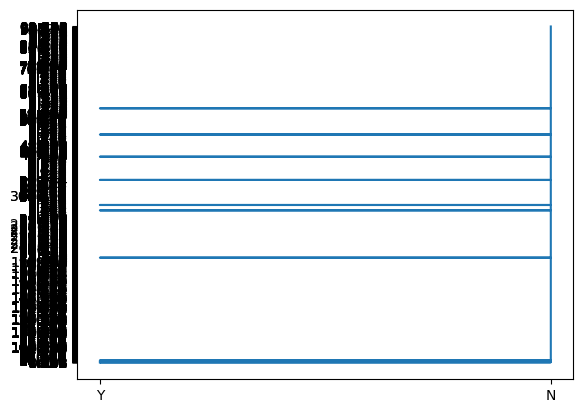

In [27]:
Diameter_PHA = df.select("Diameter","PHA").orderBy("Diameter").dropna().rdd.map(lambda x: [y for y in x]).collect()

print(Diameter_PHA[:10])

Diameter = [x[0] for x in Diameter_PHA]
PHA = [x[1] for x in Diameter_PHA]

import matplotlib.pyplot as plt
plt.plot(PHA,Diameter)

In [6]:
df.select([x for x in df.columns[:15]]).show()

25/11/18 17:48:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 17:48:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 17:48:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 17:48:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 17:48:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+--------+-------+-----------------+----+----------+------+---+---+----+--------+------+--------------+--------+---------+---------+
|      id|  spkid|        full_name|pdes|      name|prefix|neo|pha|   H|diameter|albedo|diameter_sigma|orbit_id|    epoch|epoch_mjd|
+--------+-------+-----------------+----+----------+------+---+---+----+--------+------+--------------+--------+---------+---------+
|a0000001|2000001|          1 Ceres|   1|     Ceres|  NULL|  N|  N| 3.4|   939.4| 0.090|           0.2|  JPL 47|2458600.5|    58600|
|a0000002|2000002|         2 Pallas|   2|    Pallas|  NULL|  N|  N| 4.2|     545| 0.101|            18|  JPL 37|2459000.5|    59000|
|a0000003|2000003|           3 Juno|   3|      Juno|  NULL|  N|  N|5.33| 246.596| 0.214|        10.594| JPL 112|2459000.5|    59000|
|a0000004|2000004|          4 Vesta|   4|     Vesta|  NULL|  N|  N| 3.0|   525.4|0.4228|           0.2|  JPL 35|2458600.5|    58600|
|a0000005|2000005|        5 Astraea|   5|   Astraea|  NULL|  N|  N| 6

In [34]:
abc = df.filter(col("pha") == "Y").select(col("diameter")).dropna().rdd.flatMap(lambda x: [y for y in x]).collect()

print(sum([float(y) for y in abc])/len(abc))

print(max(abc))





25/11/18 18:41:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:41:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:41:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:41:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/18 18:41:14 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


1.8210689655172414
6.25


In [ ]:
from pyspark.sql.types import IntegerType, FloatType, LongType
from pyspark.sql.functions import col

df_features = df.select([x for x in df.columns[17:40]])

for column_header in df_features.columns:
    df_features = df_features.withColumn(column_header,col(column_header).try_cast(FloatType()))

df_features.schema